<a href="https://colab.research.google.com/github/annauk/sentimentalanalysis/blob/master/workfromhome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
#add some comments
#line 2 for comments
from google.colab import drive
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse
plt.style.use('fivethirtyeight')




In [227]:

# Load the data
from google.colab import files
uploaded = files.upload()
twitter_credentials = pd.read_csv("twitter_credentials.csv")
ACCESS_TOKEN= twitter_credentials["key"][0]
ACCESS_TOKEN_SECRET = twitter_credentials["key"][1]
CONSUMER_KEY = twitter_credentials["key"][2]
CONSUMER_SECRET = twitter_credentials["key"][3]

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api=tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)




Saving twitter_credentials.csv to twitter_credentials (22).csv


In [278]:
searchText=['work from home OR workfromhome']
max_tweets = 100
posts = tweepy.Cursor(api.search, q=searchText,lang="en").items(max_tweets)
x = 1
d = {}      
for tweet in posts:
    analysis = TextBlob(tweet.text)
    x= x+1
    d[tweet.text] = analysis.sentiment
    c = ['Tweets','Sentiment']    #Create tweet and sentiment column
    df = pd.DataFrame(list(d.items()), columns=c)
    df 

In [285]:
  #Function to cleaning the tweets
  def cleanTxt(text):
      text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text)
 
      return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets,Sentiment
0,RT Everybody meet Lindsay Richardson of Sacra...,"(-0.2333333333333333, 0.35555555555555557)"
1,Trailblazer Jim Mitchell shares how tuned int...,"(0.0, 0.0)"
2,Went to the bank got coffee cleaned the house ...,"(-0.15555555555555559, 0.2888888888888889)"
3,RT After a Black teen employee said he was se...,"(-0.1111111111111111, 0.2888888888888889)"
4,RT Napping every day here Time to get to wor...,"(0.5, 1.0)"
5,RT As NYC continues reopening as part of Phas...,"(0.0, 0.0)"
6,Could the expectation that people work from ho...,"(0.5, 0.5)"
7,Hope the day goes by fast today I already wann...,"(0.2, 0.6)"
8,RT Screaming I DONT WORK JOBS BITCH I AM A JO...,"(0.0, 0.0)"
9,RT A third of staff want to work from home lo...,"(-0.025, 0.2)"


In [286]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Sentiment,Subjectivity,Polarity
0,RT Everybody meet Lindsay Richardson of Sacra...,"(-0.2333333333333333, 0.35555555555555557)",0.355556,-0.233333
1,Trailblazer Jim Mitchell shares how tuned int...,"(0.0, 0.0)",0.000000,0.000000
2,Went to the bank got coffee cleaned the house ...,"(-0.15555555555555559, 0.2888888888888889)",0.288889,-0.155556
3,RT After a Black teen employee said he was se...,"(-0.1111111111111111, 0.2888888888888889)",0.288889,-0.111111
4,RT Napping every day here Time to get to wor...,"(0.5, 1.0)",0.000000,0.000000
5,RT As NYC continues reopening as part of Phas...,"(0.0, 0.0)",0.000000,0.000000
6,Could the expectation that people work from ho...,"(0.5, 0.5)",0.500000,0.500000
7,Hope the day goes by fast today I already wann...,"(0.2, 0.6)",0.600000,0.200000
8,RT Screaming I DONT WORK JOBS BITCH I AM A JO...,"(0.0, 0.0)",0.000000,0.000000
9,RT A third of staff want to work from home lo...,"(-0.025, 0.2)",0.200000,-0.025000


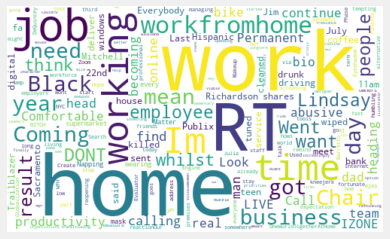

In [291]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, background_color ='white',random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [287]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
#df

,Tweets,Sentiment,Subjectivity,Polarity,Analysis
0,RT Everybody meet Lindsay Richardson of Sacra...,"(-0.2333333333333333, 0.35555555555555557)",0.355556,-0.233333,Negative
1,Trailblazer Jim Mitchell shares how tuned int...,"(0.0, 0.0)",0.000000,0.000000,Neutral
2,Went to the bank got coffee cleaned the house ...,"(-0.15555555555555559, 0.2888888888888889)",0.288889,-0.155556,Negative
3,RT After a Black teen employee said he was se...,"(-0.1111111111111111, 0.2888888888888889)",0.288889,-0.111111,Negative
4,RT Napping every day here Time to get to wor...,"(0.5, 1.0)",0.000000,0.000000,Neutral
5,RT As NYC continues reopening as part of Phas...,"(0.0, 0.0)",0.000000,0.000000,Neutral
6,Could the expectation that people work from ho...,"(0.5, 0.5)",0.500000,0.500000,Positive
7,Hope the day goes by fast today I already wann...,"(0.2, 0.6)",0.600000,0.200000,Positive
8,RT Screaming I DONT WORK JOBS BITCH I AM A JO...,"(0.0, 0.0)",0.000000,0.000000,Neutral
9,RT A third of staff want to work from home lo...,"(-0.025, 0.2)",0.200000,-0.025000,Negative


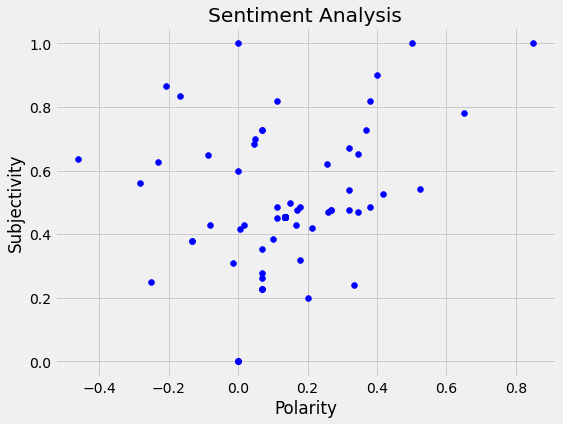

In [266]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [269]:
# Show the value counts
df['Analysis'].value_counts()

Positive    65
Negative    11
Neutral      6
Name: Analysis, dtype: int64

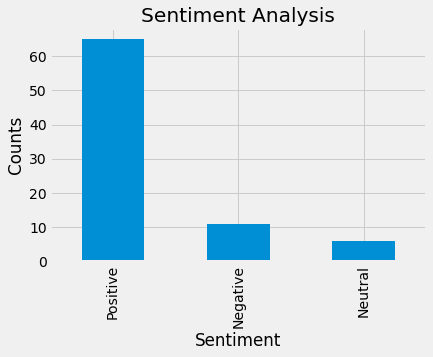

In [270]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [290]:
from google.colab import files
df.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>